In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the libraries

import numpy as np # Used for working with array
import random
import matplotlib.pyplot as plt # to display out image
from keras.models import Sequential # importing sequential model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten # importing convolutional layers as Conv2D, MaxPooling2D, fully connected network as Dense, 2D to 1D by Flatten

In [ ]:
# path for files

xtrain = '/content/drive/MyDrive/Dataset/cats_and_dogs_images/input.csv'
ytrain = '/content/drive/MyDrive/Dataset/cats_and_dogs_images/labels.csv'
xtest = '/content/drive/MyDrive/Dataset/cats_and_dogs_images/input_test.csv'
ytest = '/content/drive/MyDrive/Dataset/cats_and_dogs_images/labels_test.csv'

In [ ]:
# load dataset

X_train = np.loadtxt(xtrain, delimiter = ',')
y_train = np.loadtxt(ytrain, delimiter = ',')
X_test = np.loadtxt(xtest, delimiter = ',')
y_test = np.loadtxt(ytest, delimiter = ',')

In [ ]:
# resizing dataset

X_train = X_train.reshape(len(X_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

# as values are in range from 0 to 255
# but to train our model appropriately we need to rescale these values between 0 to 1

X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train[1, :]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [ ]:
# shape of dataset after resizing

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


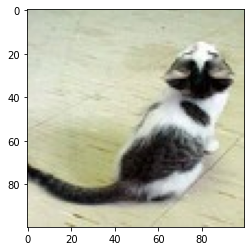

In [ ]:
# displaying random image

index = random.randint(0, len(X_train))
plt.imshow(X_train[index, :])
plt.show()

In [ ]:
# model

# Sequential model means that the layers are going to be stacked up in the sequence
# first convolutional layer, than maxpooling layer, than another convolutional layer, than maxpooling layer, than we couple of fully connected layers and thats how out convoltional neural network made
model = Sequential([
    Conv2D(32, (3, 3), # first parameter of convolutional layer are the number of filters we want to use and second parameter is the size of the filter
           activation = 'relu',
    
           # for the first layer always in keras we need to mention the input shape which means what kind of shape is this model expecting
           input_shape = (100, 100, 3) # our model expecting 100x100x3 size image
          ),# this is how we add our first layer
    
    #adding next layer which is maxpooling layer
    MaxPooling2D((2, 2)), # one parameter which is filter size
    
    # second convolutioanl layer
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    
    Flatten(),
    # now making fully connected layer using Dense()
    Dense(64, activation = 'relu'), # first parameter is number of neurons we want to keep in first fully connected layer and second parameter is the activation function we are using
    
    # final fully connected layer which is our output layer
    # output layer must have the same number of neurons as our output class but for binary classification we only need one output neuron
    Dense(1, activation = 'sigmoid') # activation function is SIGMOID because it is a bianry classification
])

In [ ]:
# we can also make model by add individual layer separately as it is Sequential

model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
# now compile the model by adding the loss and the back propagation model
# parameters are loss, optimizer and metrics
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# 'binary_crossentropy' because we are implimenting binary classification
# metrics indicate a metric on which we want to evaluate our model

In [ ]:
# train with our input data

history = model.fit(X_train, y_train, epochs = 10, batch_size = 64)
# epochs = number of epochs for which we want to train our model

Epoch 1/10
32/32 [==============================] - 23s 705ms/step - loss: 0.7302 - accuracy: 0.4950
Epoch 2/10
32/32 [==============================] - 22s 686ms/step - loss: 0.6919 - accuracy: 0.5020
Epoch 3/10
32/32 [==============================] - 22s 677ms/step - loss: 0.6854 - accuracy: 0.5590
Epoch 4/10
32/32 [==============================] - 26s 820ms/step - loss: 0.6485 - accuracy: 0.6330
Epoch 5/10
32/32 [==============================] - 22s 674ms/step - loss: 0.5850 - accuracy: 0.7000
Epoch 6/10
32/32 [==============================] - 22s 677ms/step - loss: 0.5410 - accuracy: 0.7190
Epoch 7/10
32/32 [==============================] - 22s 677ms/step - loss: 0.4957 - accuracy: 0.7565
Epoch 8/10
32/32 [==============================] - 22s 677ms/step - loss: 0.4397 - accuracy: 0.7985
Epoch 9/10
32/32 [==============================] - 22s 681ms/step - loss: 0.3997 - accuracy: 0.8080
Epoch 10/10
32/32 [==============================] - 22s 677ms/step - loss: 0.3523 - accura

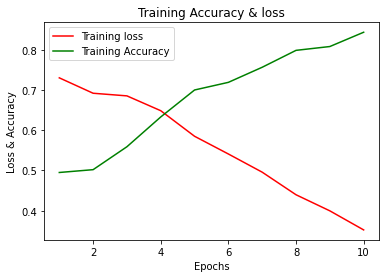

In [ ]:
loss_train = history.history['loss']
accuracy_train = history.history['accuracy']
# loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, accuracy_train, 'g', label='Training Accuracy')
# plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training Accuracy & loss')
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.legend()
plt.show()

In [ ]:
# evaluate the model on the test data set

model.evaluate(X_test, y_test)

13/13 [==============================] - 1s 93ms/step - loss: 0.5722 - accuracy: 0.6900


[0.5722139477729797, 0.6899999976158142]

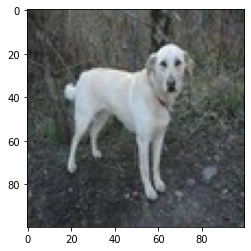

1/1 [==============================] - 0s 192ms/step
probability of image:  [[0.13601287]]
According to model it is:  dog


In [ ]:
# making prediction

index2 = random.randint(0, len(X_test))
plt.imshow(X_test[index2, :])
plt.show()

y_pred = model.predict(X_test[index2, :].reshape(1, 100, 100, 3))
print('probability of image: ', y_pred)

y_pred = y_pred > 0.5
print('boolean probability of image: ', y_pred)
if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print('According to model it is: ', pred)